In [2]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models
from keras.utils.vis_utils import plot_model

Epoch 1/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3774
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.2681


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

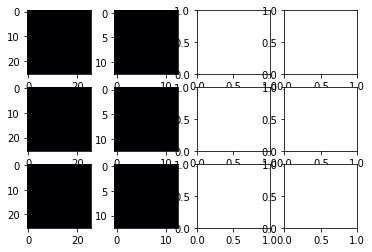

In [8]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28,28, 1)
training_images = training_images / 255

test_images = test_images.reshape(10000, 28,28, 1)
test_images = test_images / 255

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, tf.nn.relu),
                                    tf.keras.layers.Dense(10, tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=2)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 2
SECOND_IMAGE = 3
THIRD_IMAGE = 5
CONVOLUTION_NUMBER = 4

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)